## importing Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## importing the data from the excel

In [65]:
data = pd.read_csv('IMBD.csv')

In [66]:
data

,Title,Release_Year,Duration,Collection,Genre,Director,Rating,Votes
0,The Walking Dead,2010–2022,44,"960,865","Drama, Horror, Thriller",Andrew Lincoln,8.2,"960,865"
1,Predator,1987,107,59.74,"Action, Adventure, Horror",John McTiernan,7.8,"411,198"
2,Predators,2010,107,52,"Action, Adventure, Sci-Fi",Nimród Antal,6.4,"227,827"
3,Predator 2,1990,108,30.67,"Action, Horror, Sci-Fi",Stephen Hopkins,6.3,"164,417"
4,The Godfather,1972,175,134.97,"Crime, Drama",Francis Ford Coppola,9.2,"1,819,087"
...,...,...,...,...,...,...,...,...
595,Evan Almighty,2007,96,100.46,"Comedy, Family, Fantasy",Tom Shadyac,5.4,"147,385"
596,Antz,1998,83,90.76,"Animation, Adventure, Comedy",Eric Darnell,6.6,"154,890"
597,Bride & Prejudice,2004,122,6.6,"Comedy, Drama, Musical",Gurinder Chadha,6.2,"20,887"
598,Deuce Bigalow: European Gigolo,2005,83,22.26,Comedy,Mike Bigelow,4.6,"51,030"


## Data Cleaning

In [67]:
data = data.drop([0])     # dropping abnormal row

In [68]:
data

,Title,Release_Year,Duration,Collection,Genre,Director,Rating,Votes
1,Predator,1987,107,59.74,"Action, Adventure, Horror",John McTiernan,7.8,"411,198"
2,Predators,2010,107,52,"Action, Adventure, Sci-Fi",Nimród Antal,6.4,"227,827"
3,Predator 2,1990,108,30.67,"Action, Horror, Sci-Fi",Stephen Hopkins,6.3,"164,417"
4,The Godfather,1972,175,134.97,"Crime, Drama",Francis Ford Coppola,9.2,"1,819,087"
5,The Shawshank Redemption,1994,142,28.34,Drama,Frank Darabont,9.3,"2,626,148"
...,...,...,...,...,...,...,...,...
595,Evan Almighty,2007,96,100.46,"Comedy, Family, Fantasy",Tom Shadyac,5.4,"147,385"
596,Antz,1998,83,90.76,"Animation, Adventure, Comedy",Eric Darnell,6.6,"154,890"
597,Bride & Prejudice,2004,122,6.6,"Comedy, Drama, Musical",Gurinder Chadha,6.2,"20,887"
598,Deuce Bigalow: European Gigolo,2005,83,22.26,Comedy,Mike Bigelow,4.6,"51,030"


In [69]:
# finding the null values present in the dataset
#  - is na()
#  - is null()


data.isna().sum()

Title           0
Release_Year    0
Duration        0
Collection      0
Genre           0
Director        0
Rating          0
Votes           0
dtype: int64

In [70]:
data.isnull().sum()

Title           0
Release_Year    0
Duration        0
Collection      0
Genre           0
Director        0
Rating          0
Votes           0
dtype: int64

In [71]:
## find any duplicate values present in the data

In [72]:
data[data.duplicated()]

,Title,Release_Year,Duration,Collection,Genre,Director,Rating,Votes


## Data Manupulating

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 1 to 599
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         599 non-null    object 
 1   Release_Year  599 non-null    object 
 2   Duration      599 non-null    int64  
 3   Collection    599 non-null    object 
 4   Genre         599 non-null    object 
 5   Director      599 non-null    object 
 6   Rating        599 non-null    float64
 7   Votes         599 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.6+ KB


**The most of the columns are in the object/ string format, here we are converting the data type of the columns**

### Changing the data type for the columns

In [74]:
COLLECTION = []
vote = []
release=[]

In [75]:
for i in data['Votes']:
    a = i.split(',')
    b = ''.join(a)
    vote.append(int(b))

    
for i in data['Collection']:
    a  =i.replace(',','.')
    COLLECTION.append(float(a))

    
for i in data['Release_Year']:
    release.append(int(i))

In [76]:
data['Release_Year'] = release
data['Votes'] = vote
data['Collection']= COLLECTION

#### checking the type of the columns

In [77]:
# finding the data type of each column


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 1 to 599
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         599 non-null    object 
 1   Release_Year  599 non-null    int64  
 2   Duration      599 non-null    int64  
 3   Collection    599 non-null    float64
 4   Genre         599 non-null    object 
 5   Director      599 non-null    object 
 6   Rating        599 non-null    float64
 7   Votes         599 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 37.6+ KB


In [78]:
data.describe()

,Release_Year,Duration,Collection,Rating,Votes
count,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,1999.480801,113.946578,108.915471,6.827379,3.555362e+05
std,10.062308,23.117277,95.735014,1.035031,3.645239e+05
min,1939.000000,75.000000,0.010000,1.900000,1.775500e+04
25%,1996.000000,97.000000,42.875000,6.200000,1.404390e+05
50%,2003.000000,109.000000,80.170000,6.900000,2.336850e+05
75%,2006.000000,126.000000,142.805000,7.600000,4.123090e+05
max,2011.000000,238.000000,760.510000,9.300000,2.626148e+06


# 1.Univarient Analysis 

In [79]:
data.head(10)

,Title,Release_Year,Duration,Collection,Genre,Director,Rating,Votes
1,Predator,1987,107,59.74,"Action, Adventure, Horror",John McTiernan,7.8,411198
2,Predators,2010,107,52.00,"Action, Adventure, Sci-Fi",Nimród Antal,6.4,227827
3,Predator 2,1990,108,30.67,"Action, Horror, Sci-Fi",Stephen Hopkins,6.3,164417
4,The Godfather,1972,175,134.97,"Crime, Drama",Francis Ford Coppola,9.2,1819087
5,The Shawshank Redemption,1994,142,28.34,Drama,Frank Darabont,9.3,2626148
6,Forrest Gump,1994,142,330.25,"Drama, Romance",Robert Zemeckis,8.8,2031416
7,Orphan,2009,123,41.60,"Horror, Mystery, Thriller",Jaume Collet-Serra,7.0,218265
8,Pulp Fiction,1994,154,107.93,"Crime, Drama",Quentin Tarantino,8.9,2010447
9,Heat,1995,170,67.44,"Action, Crime, Drama",Michael Mann,8.3,644126
10,The Lord of the Rings: The Fellowship of the Ring,2001,178,315.54,"Action, Adventure, Drama",Peter Jackson,8.8,1822526


### 1.1  Finding repeating years

In [80]:
## counting the years how many times that they are occured


In [120]:
data['Release_Year'].value_counts()

2004    48
2007    46
2005    42
2003    38
2008    37
2006    34
2001    33
2002    32
2000    28
2010    28
2009    25
1999    20
1997    18
1995    16
1998    15
1994    12
1992    11
1996    11
1990    10
1987     9
1993     8
1985     8
1989     6
1984     6
1979     5
1982     5
1978     4
1983     4
1991     4
1968     3
1980     3
1988     3
1986     3
1981     3
1973     3
1964     2
1962     2
2011     2
1975     2
1974     2
1976     1
1971     1
1939     1
1972     1
1953     1
1951     1
1940     1
1977     1
Name: Release_Year, dtype: int64

### counting the repeating years

In [82]:
## counting the years how many times that they are occured
## visualization

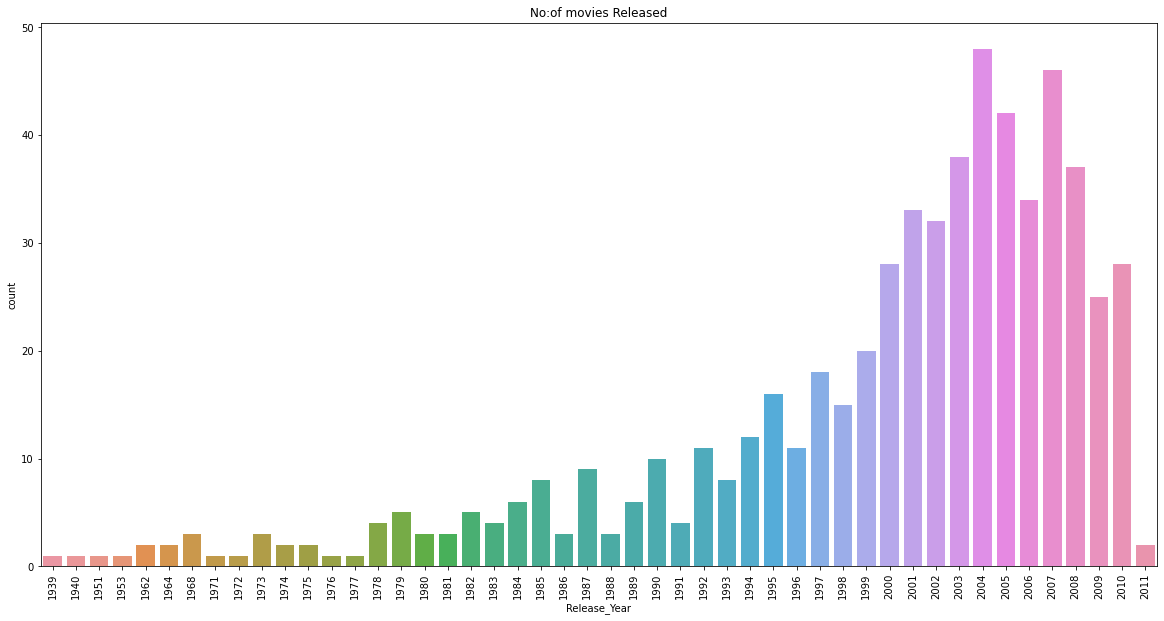

In [83]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Release_Year',data= data)
plt.title ('No:of movies Released')
plt.xticks(rotation = 90)
plt.show()

## 1.2 No:of times the each Genre is Repeating

In [84]:
# counting how many times that the each genre had occured


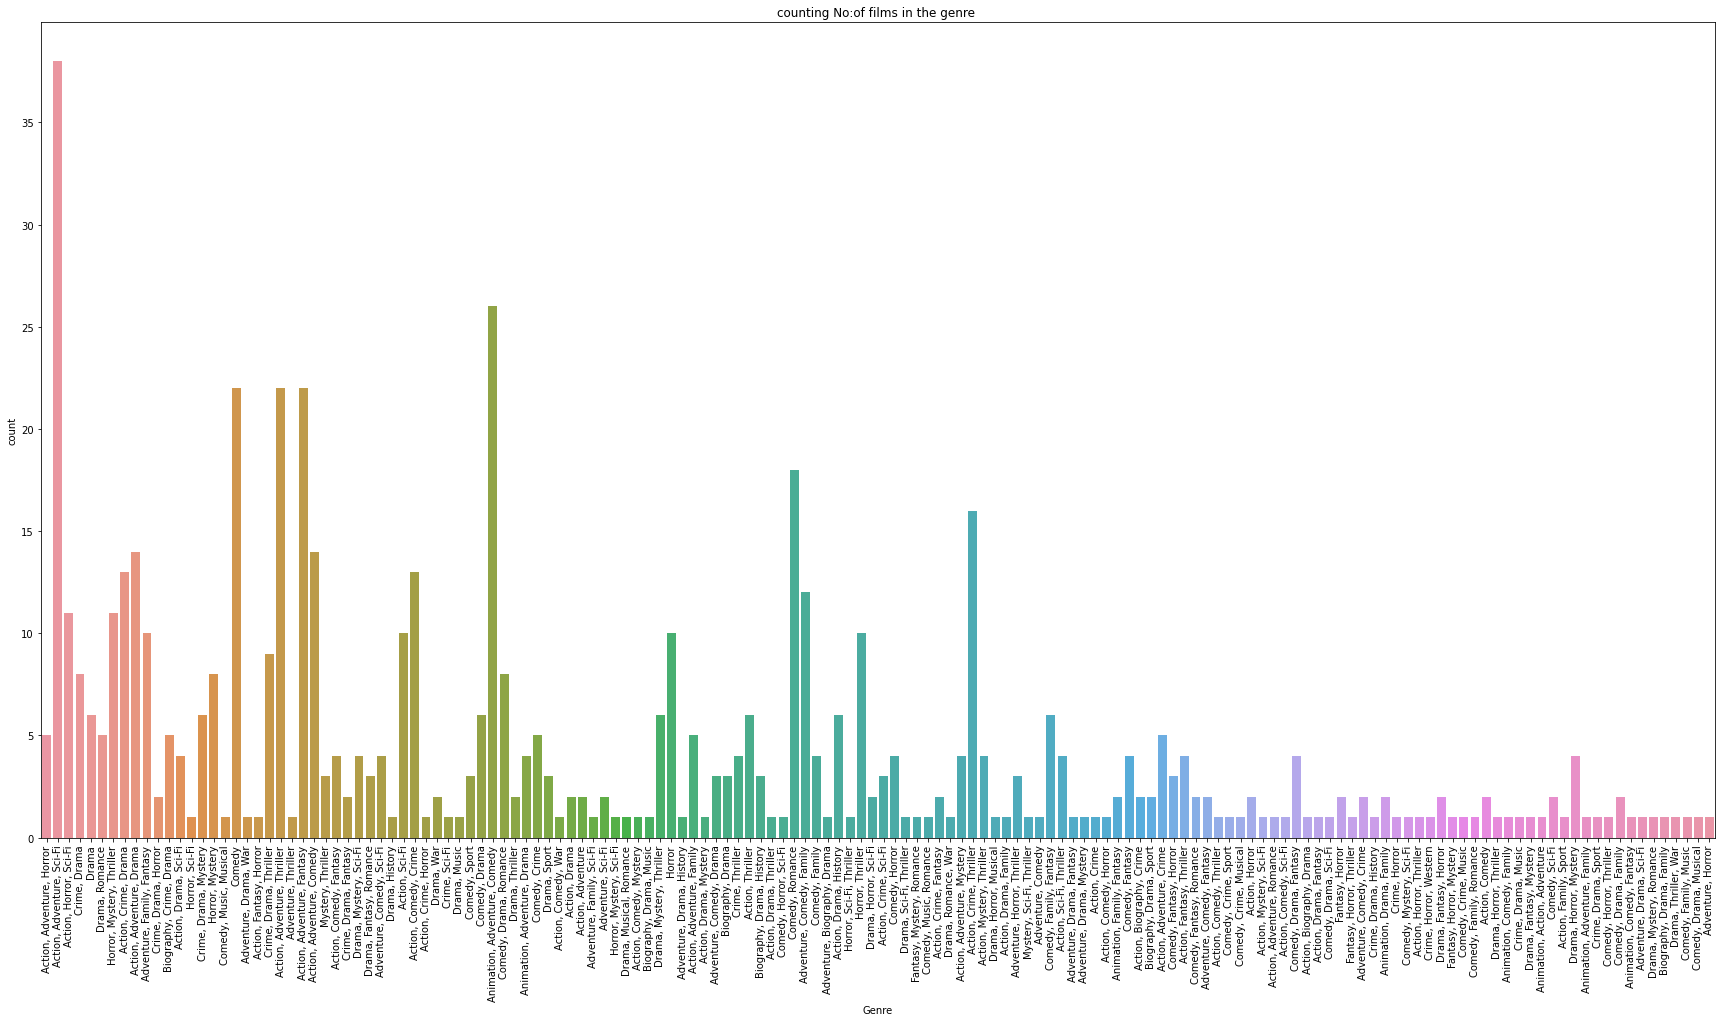

In [85]:
plt.figure(figsize=(30,15))
sns.countplot(x= 'Genre',data= data)
plt.xticks(rotation= 90)
plt.title('counting No:of films in the genre ')
plt.show()

In [86]:
# counting how many times that the each genre had occured

In [87]:
data['Genre'].value_counts()

Action, Adventure, Sci-Fi       38
Animation, Adventure, Comedy    26
Action, Adventure, Fantasy      22
Action, Adventure, Thriller     22
Comedy                          22
                                ..
Adventure, Drama, Mystery        1
Adventure, Drama, Fantasy        1
Adventure, Comedy                1
Mystery, Sci-Fi, Thriller        1
Adventure, Horror                1
Name: Genre, Length: 150, dtype: int64

## dividing the genre into sub parts

In [88]:
genre_sub = []
genre_cat = []
uniq_genre = []

In [89]:
for i in data['Genre']:
    genre_sub.append(i.split(','))

for i in genre_sub:
    for j in i:
        genre_cat.append(j.replace(" ",''))

for i in genre_cat:
    if i not in uniq_genre:
        uniq_genre.append(i)



In [90]:
uniq_genre

['Action',
 'Adventure',
 'Horror',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Romance',
 'Mystery',
 'Thriller',
 'Family',
 'Fantasy',
 'Biography',
 'Comedy',
 'Music',
 'Musical',
 'War',
 'History',
 'Sport',
 'Animation',
 'Western']

### 1.3 No: of Action movie in the Data

In [91]:
(data[data['Genre'].str.contains('Action')])

,Title,Release_Year,Duration,Collection,Genre,Director,Rating,Votes
1,Predator,1987,107,59.74,"Action, Adventure, Horror",John McTiernan,7.8,411198
2,Predators,2010,107,52.00,"Action, Adventure, Sci-Fi",Nimród Antal,6.4,227827
3,Predator 2,1990,108,30.67,"Action, Horror, Sci-Fi",Stephen Hopkins,6.3,164417
9,Heat,1995,170,67.44,"Action, Crime, Drama",Michael Mann,8.3,644126
10,The Lord of the Rings: The Fellowship of the Ring,2001,178,315.54,"Action, Adventure, Drama",Peter Jackson,8.8,1822526
...,...,...,...,...,...,...,...,...
583,Bad Boys II,2003,147,138.61,"Action, Comedy, Crime",Michael Bay,6.6,249271
585,Spy Kids 2: Island of Lost Dreams,2002,100,85.85,"Action, Adventure, Comedy",Robert Rodriguez,5.2,67555
588,Underworld: Rise of the Lycans,2009,92,45.80,"Action, Fantasy, Thriller",Patrick Tatopoulos,6.5,159849
591,The Green Hornet,2011,119,98.78,"Action, Comedy, Crime",Michel Gondry,5.8,160521


### 1.4 No: of Comedy movie in the Data

In [92]:
(data[data['Genre'].str.contains('Comedy')])

,Title,Release_Year,Duration,Collection,Genre,Director,Rating,Votes
27,Grease 2,1982,115,15.17,"Comedy, Music, Musical",Patricia Birch,4.4,35767
28,American Pie,1999,95,102.56,Comedy,Paul Weitz,7.0,403558
38,Men in Black,1997,98,250.69,"Action, Adventure, Comedy",Barry Sonnenfeld,7.3,561171
47,Ghostbusters,1984,105,238.63,"Action, Comedy, Fantasy",Ivan Reitman,7.8,409289
54,Back to the Future,1985,116,210.61,"Adventure, Comedy, Sci-Fi",Robert Zemeckis,8.5,1179108
...,...,...,...,...,...,...,...,...
593,Madagascar: Escape 2 Africa,2008,89,180.01,"Animation, Adventure, Comedy",Eric Darnell,6.6,225680
595,Evan Almighty,2007,96,100.46,"Comedy, Family, Fantasy",Tom Shadyac,5.4,147385
596,Antz,1998,83,90.76,"Animation, Adventure, Comedy",Eric Darnell,6.6,154890
597,Bride & Prejudice,2004,122,6.60,"Comedy, Drama, Musical",Gurinder Chadha,6.2,20887


### 1.5 No:of Sci-Fi Movie present in the Data

In [93]:
(data[data['Genre'].str.contains('Sci-Fi')])

,Title,Release_Year,Duration,Collection,Genre,Director,Rating,Votes
2,Predators,2010,107,52.00,"Action, Adventure, Sci-Fi",Nimród Antal,6.4,227827
3,Predator 2,1990,108,30.67,"Action, Horror, Sci-Fi",Stephen Hopkins,6.3,164417
18,Volcano,1997,104,49.32,"Action, Drama, Sci-Fi",Mick Jackson,5.5,76770
20,Inception,2010,148,292.58,"Action, Adventure, Sci-Fi",Christopher Nolan,8.8,2303446
21,Spider-Man,2002,121,403.71,"Action, Adventure, Sci-Fi",Sam Raimi,7.4,805449
...,...,...,...,...,...,...,...,...
555,The Day the Earth Stood Still,2008,104,79.37,"Adventure, Drama, Sci-Fi",Scott Derrickson,5.5,170628
571,Daybreakers,2009,98,30.10,"Action, Horror, Sci-Fi",Michael Spierig,6.4,128888
572,Æon Flux,2005,93,25.86,"Action, Adventure, Sci-Fi",Karyn Kusama,5.4,128412
581,RoboCop 3,1993,104,10.70,"Action, Crime, Sci-Fi",Fred Dekker,4.1,50486


## 1.6 how many times that each genre had occured

In [94]:
Counter(genre_cat)

Counter({'Action': 257,
         'Adventure': 212,
         'Horror': 95,
         'Sci-Fi': 97,
         'Crime': 108,
         'Drama': 175,
         'Romance': 43,
         'Mystery': 61,
         'Thriller': 115,
         'Family': 51,
         'Fantasy': 82,
         'Biography': 19,
         'Comedy': 195,
         'Music': 7,
         'Musical': 5,
         'War': 6,
         'History': 12,
         'Sport': 11,
         'Animation': 38,
         'Western': 1})

In [136]:
gen_cat = pd.DataFrame([genre_cat]).T
gen_cat

,0
0,Action
1,Adventure
2,Horror
3,Action
4,Adventure
...,...
1585,Drama
1586,Musical
1587,Comedy
1588,Adventure


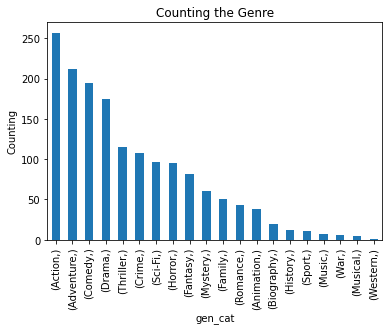

In [144]:
gen_cat.value_counts().plot.bar()
plt.title('Counting the Genre')
plt.xlabel('gen_cat')
plt.ylabel('Counting')
plt.show()

### 1.7 No: of movies made by the each  Directors

In [146]:
data['Director'].value_counts()

Steven Spielberg     9
Tim Burton           9
Quentin Tarantino    7
Sam Raimi            7
James Cameron        7
                    ..
Nicholas Stoller     1
John Hillcoat        1
Tom Brady            1
Sam Weisman          1
Breck Eisner         1
Name: Director, Length: 342, dtype: int64

In [96]:
Counter(data['Director'])

Counter({'John McTiernan': 3,
         'Nimród Antal': 1,
         'Stephen Hopkins': 1,
         'Francis Ford Coppola': 3,
         'Frank Darabont': 3,
         'Robert Zemeckis': 6,
         'Jaume Collet-Serra': 1,
         'Quentin Tarantino': 7,
         'Michael Mann': 5,
         'Peter Jackson': 5,
         'Paul W.S. Anderson': 4,
         'James Cameron': 7,
         'Chris Columbus': 6,
         'Christopher Nolan': 6,
         'David Fincher': 6,
         'Mary Harron': 1,
         'Mike Newell': 3,
         'Mick Jackson': 1,
         'Martin Scorsese': 5,
         'Sam Raimi': 7,
         'Colin Strause': 1,
         'Ridley Scott': 5,
         'Jim Gillespie': 1,
         'Steven Spielberg': 9,
         'Patricia Birch': 1,
         'Paul Weitz': 1,
         'Francis Lawrence': 2,
         'Brian De Palma': 4,
         'George Lucas': 4,
         'Barry Sonnenfeld': 3,
         'Paul Verhoeven': 4,
         'Gore Verbinski': 4,
         'Ethan Coen': 1,
         'Jon F

In [97]:
## counting the no:of movies made by the each director

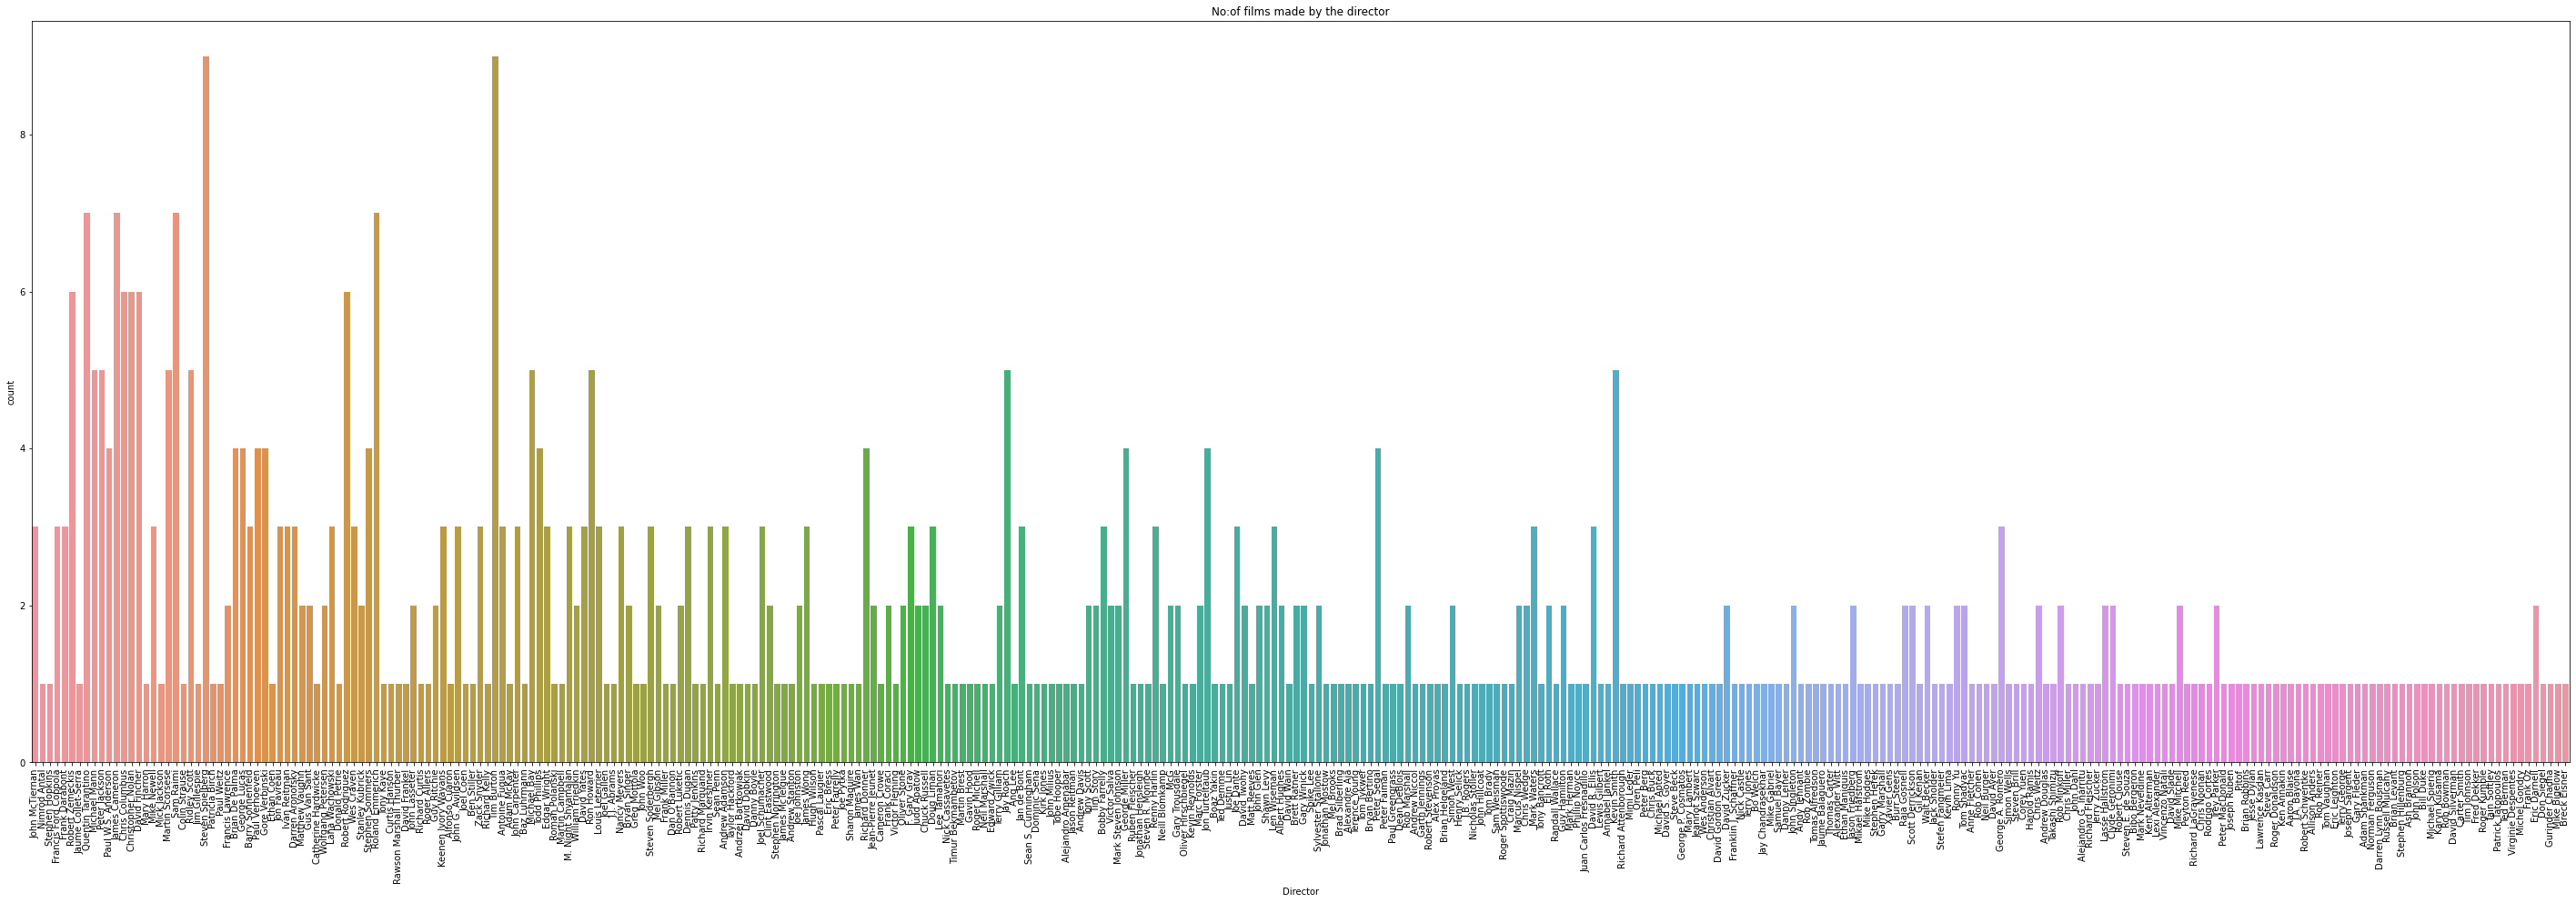

In [98]:
plt.figure(figsize=(50,15))
sns.countplot(x = 'Director',data = data)
plt.xticks(rotation = 90)
plt.title('No:of films made by the director')
plt.show()

## 2 Bivarient Analysis

## 2.1 Displaying the Movie which is more than 150 min

In [147]:
data[data['Duration']>=150]['Title'] . head(10)

4                                         The Godfather
8                                          Pulp Fiction
9                                                  Heat
10    The Lord of the Rings: The Fellowship of the Ring
12                                              Titanic
13                Harry Potter and the Sorcerer's Stone
14                                      The Dark Knight
29                                 Inglourious Basterds
31                                         The Departed
32                                            Gladiator
Name: Title, dtype: object

## 2.2 In which year the avg highest voting

In [100]:
data.groupby('Release_Year')['Votes'].mean().sort_values(ascending=False)

Release_Year
1972    1.819087e+06
1977    1.343112e+06
1971    8.185890e+05
1994    8.170042e+05
1974    7.041830e+05
1976    5.675140e+05
1975    5.655005e+05
1999    5.276171e+05
1983    5.087600e+05
1980    4.883417e+05
1991    4.693420e+05
1995    4.489672e+05
2010    4.254036e+05
1990    4.055154e+05
2009    4.034946e+05
1988    3.881757e+05
1998    3.767091e+05
2002    3.667154e+05
2006    3.598596e+05
2003    3.507728e+05
2000    3.437799e+05
2001    3.424552e+05
1997    3.415854e+05
1979    3.404608e+05
2008    3.384009e+05
1968    3.220313e+05
2007    3.194292e+05
1939    3.131000e+05
1984    3.119575e+05
2004    3.024313e+05
1986    3.005813e+05
2005    2.838427e+05
1992    2.554588e+05
1982    2.469996e+05
1993    2.366281e+05
1996    2.308374e+05
1985    2.304885e+05
1973    2.035690e+05
1987    2.033089e+05
1989    1.830470e+05
1964    1.803290e+05
2011    1.605680e+05
1978    1.604540e+05
1981    1.600067e+05
1940    1.440970e+05
1951    1.409020e+05
1953    1.389380e+05


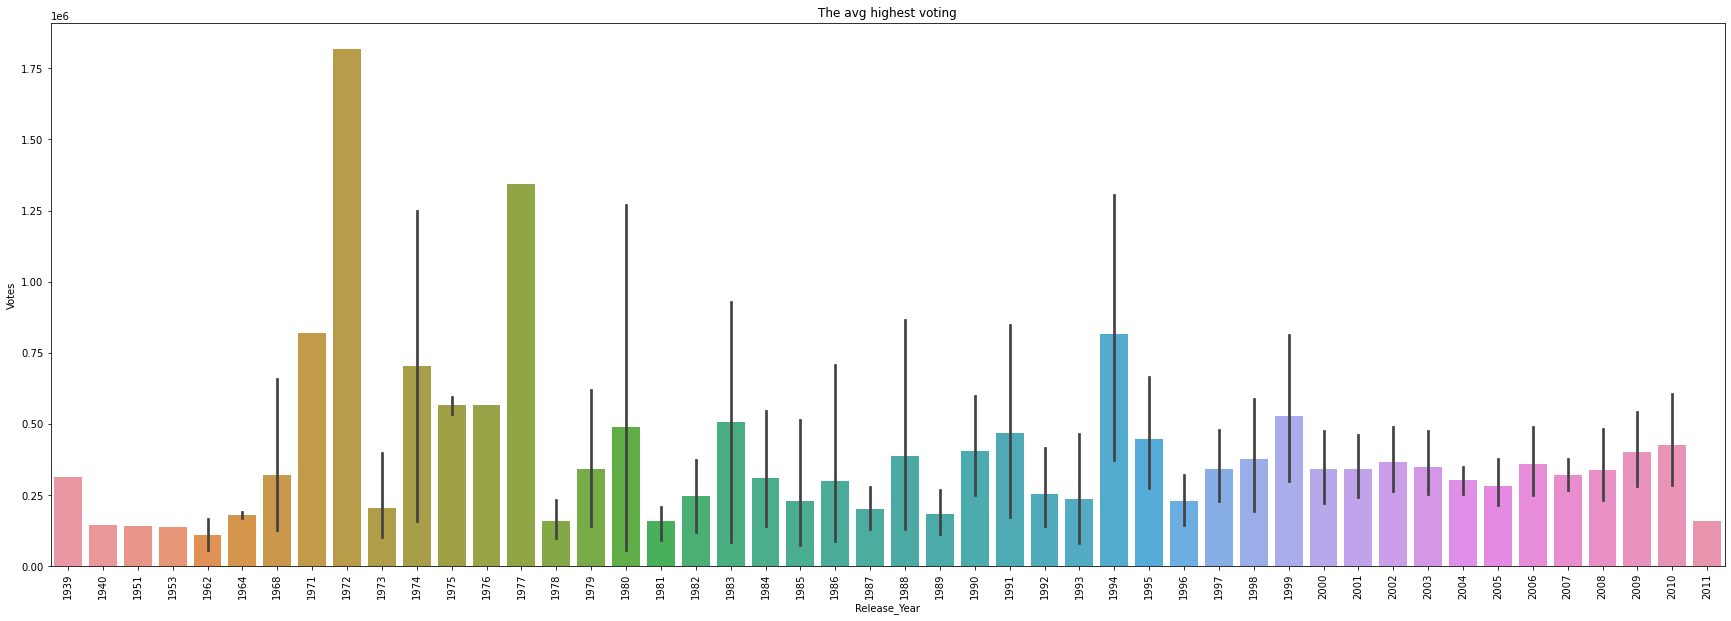

In [101]:
plt.figure(figsize=(30,10))
sns.barplot(x = 'Release_Year', y = 'Votes',data=data)
plt.title('The avg highest voting')
plt.xticks(rotation = 90)
plt.show()

## 2.3 Highest average Collection year wise 

In [102]:
data.groupby('Release_Year')['Collection'].mean().sort_values(ascending = False)

Release_Year
1977    322.740000
1939    198.680000
1991    175.702500
1999    143.281000
1972    134.970000
1975    130.615000
1994    130.197500
2009    129.872000
2002    129.261250
1980    128.928333
1984    128.700000
2003    125.036579
1986    124.966667
1997    120.506111
1983    119.532500
2010    118.729643
1976    117.240000
2007    116.369391
1996    115.291818
1993    113.225000
2004    111.666250
1982    111.280000
1989    110.303333
2001    105.399697
2005    103.933095
2000    103.184643
2006    100.940000
2008     99.545405
1973     97.763333
1998     95.799333
1995     91.263125
1990     89.812000
1953     87.400000
1940     84.250000
1964     76.675000
1992     73.042727
1978     72.310000
1988     71.830000
1985     71.713750
2011     63.950000
1987     57.544444
1979     44.202000
1974     44.080000
1968     30.146667
1962     27.585000
1981     26.110000
1971      6.210000
1951      1.070000
Name: Collection, dtype: float64

In [103]:
##  release year vs Collection

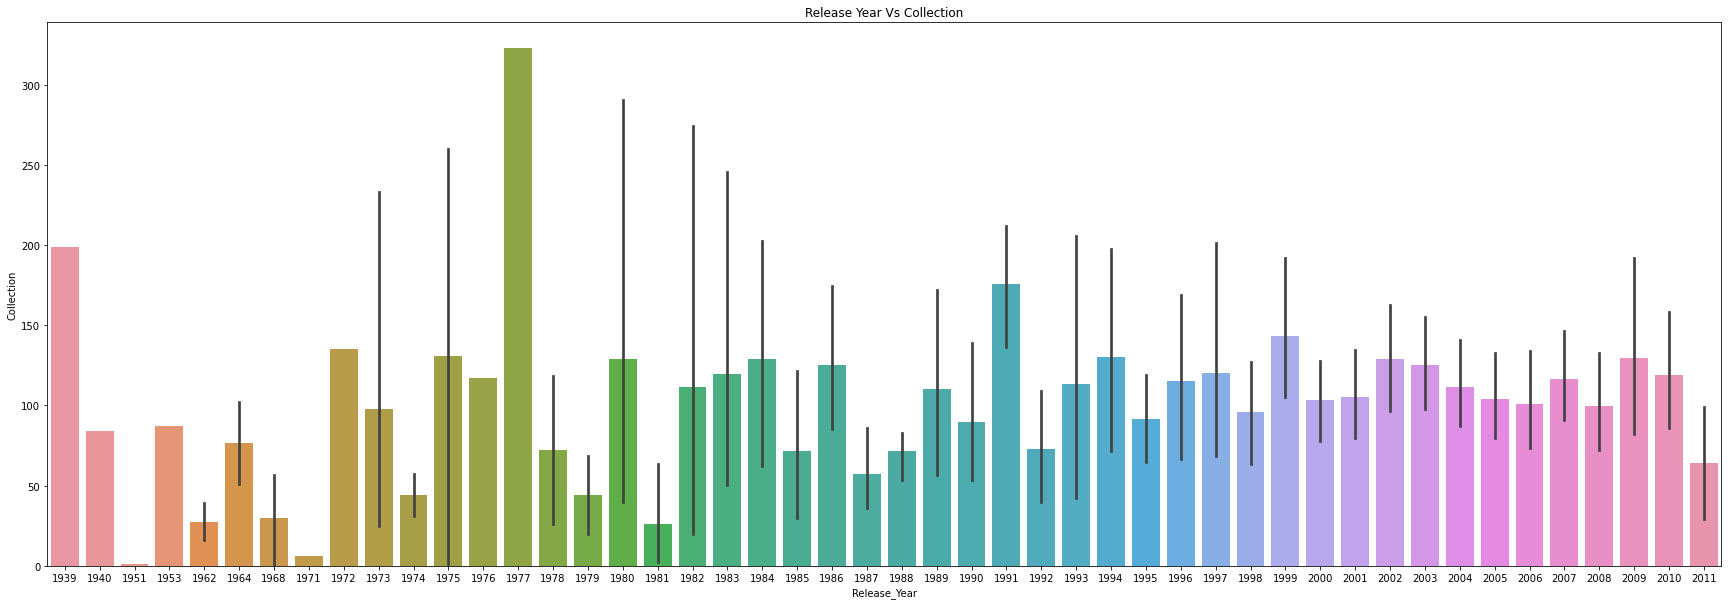

In [104]:
plt.figure(figsize = (30,10))
sns.barplot(x = 'Release_Year', y = 'Collection',data = data)
plt.title("Release Year Vs Collection")
plt.show()

## 2.4 Average rating for each director

In [105]:
data.groupby('Director')['Rating'].mean().sort_values(ascending = False)

Director
Francis Ford Coppola    8.60
Roman Polanski          8.50
Roger Allers            8.50
Tony Kaye               8.50
Christopher Nolan       8.35
                        ... 
Steven E. de Souza      4.00
Bo Welch                4.00
Pitof                   3.40
Joseph Sargent          3.00
Jason Friedberg         2.15
Name: Rating, Length: 342, dtype: float64

## 2.5 Top 14 lengthy movies  and its Duration

In [106]:
top_14=data.nlargest(14,'Duration')[['Title','Duration']].set_index('Title')
top_14

,Duration
Title,
Gone with the Wind,238
The Godfather Part II,202
The Lord of the Rings: The Return of the King,201
Titanic,194
Gandhi,191
Grindhouse,191
The Green Mile,189
King Kong,187
Pearl Harbor,183


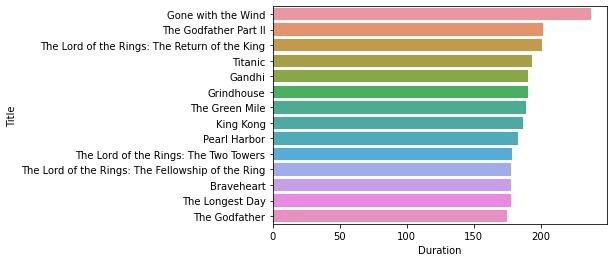

In [107]:
sns.barplot(x = 'Duration',y = top_14.index,data = top_14)
plt.show()

## 2.6 Top 14 highest movie collections

In [108]:
top_14_colle = data.nlargest(14,'Collection')[['Title','Collection']].set_index('Title')
top_14_colle

,Collection
Title,
Avatar,760.51
Titanic,659.33
The Dark Knight,534.86
Star Wars: Episode I - The Phantom Menace,474.54
Shrek 2,436.47
E.T. the Extra-Terrestrial,435.11
Pirates of the Caribbean: Dead Man's Chest,423.32
The Lion King,422.78
Spider-Man,403.71


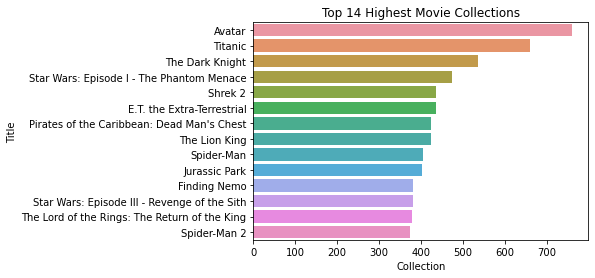

In [109]:
sns.barplot(x= 'Collection',y =top_14_colle.index,data=top_14_colle)
plt.title('Top 14 Highest Movie Collections')
plt.show()

## 2.7 Most popular movies according to collection

In [149]:
data[data['Collection'].max()==data['Collection']]['Title']

46    Avatar
Name: Title, dtype: object

## 2.8 Average rating for  movies Year wise


In [111]:
data.groupby('Release_Year')['Rating'].mean().sort_values(ascending = False).head(14)

Release_Year
1972    9.200000
1977    8.600000
1971    8.300000
1939    8.200000
1974    8.200000
1975    8.150000
1976    8.100000
1968    8.033333
1964    7.750000
1991    7.600000
1994    7.516667
1940    7.500000
1973    7.466667
1962    7.450000
Name: Rating, dtype: float64

## 2.9 Does Rating Is Effecting Collections

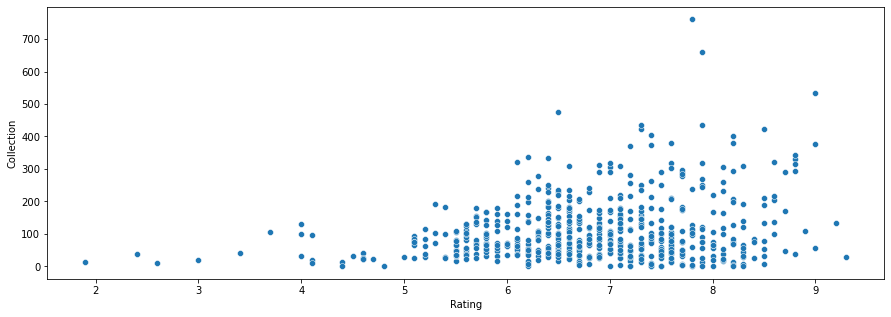

In [112]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= 'Rating', y = 'Collection',data = data)
plt.show()

## 3 MULTI VARIENT ANALYSIS

### 3.1 Display top 14 highest rated movies with its directors

In [113]:
top_high_rated_titles=data.nlargest(14,'Rating')[['Title','Rating','Director']].set_index('Title')
top_high_rated_titles

,Rating,Director
Title,,
The Shawshank Redemption,9.3,Frank Darabont
The Godfather,9.2,Francis Ford Coppola
The Dark Knight,9.0,Christopher Nolan
The Lord of the Rings: The Return of the King,9.0,Peter Jackson
The Godfather Part II,9.0,Francis Ford Coppola
Pulp Fiction,8.9,Quentin Tarantino
Forrest Gump,8.8,Robert Zemeckis
The Lord of the Rings: The Fellowship of the Ring,8.8,Peter Jackson
Fight Club,8.8,David Fincher


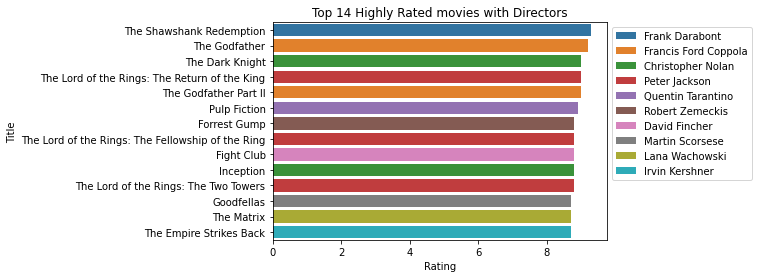

In [114]:
sns.barplot(x = 'Rating',y = top_high_rated_titles.index,data=top_high_rated_titles,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1,1),loc= 2 )
plt.title('Top 14 Highly Rated movies with Directors')
plt.show()

### Finding the corellation between complete data

In [115]:
data.corr()

,Release_Year,Duration,Collection,Rating,Votes
Release_Year,1.000000,-0.064396,0.084211,-0.236348,-0.002180
Duration,-0.064396,1.000000,0.302773,0.436951,0.479195
Collection,0.084211,0.302773,1.000000,0.222788,0.452336
Rating,-0.236348,0.436951,0.222788,1.000000,0.646815
Votes,-0.002180,0.479195,0.452336,0.646815,1.000000


<AxesSubplot:>

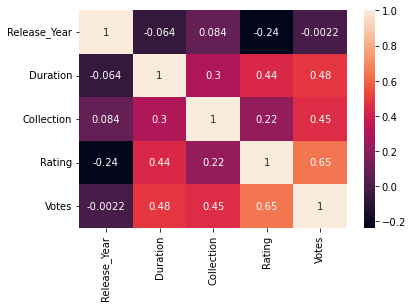

In [116]:
sns.heatmap(data.corr(),annot = True)

## Senerio

#### senerio-1

In [117]:
data[(data['Duration'] >= 150) & (data['Rating'] >= 7) & data['Director'].str.contains('James Cameron') & (data['Genre'].str.contains('Adventure'))]

,Title,Release_Year,Duration,Collection,Genre,Director,Rating,Votes
46,Avatar,2009,162,760.51,"Action, Adventure, Fantasy",James Cameron,7.8,1215930


#### senerio - 2

In [118]:
data[(data['Duration']>60) & (data['Rating']>4 ) & (data['Release_Year']==2011)]

,Title,Release_Year,Duration,Collection,Genre,Director,Rating,Votes
565,The Mechanic,2011,93,29.12,"Action, Crime, Thriller",Simon West,6.5,160615
591,The Green Hornet,2011,119,98.78,"Action, Comedy, Crime",Michel Gondry,5.8,160521


# Thank_You 